## **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## **Load Dataset**

In [3]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## **Data Overview**

In [4]:
print("Data Info:")
df.info()

print("\nMissing Values:")
df.isnull().sum()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB

Missing Values:


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## **Data Cleaning**

In [5]:
df['smoking_history'].fillna('No Info', inplace=True)
df['smoking_history'] = df['smoking_history'].replace({'No Info': 'unknown'})

# Convert categorical variables to numeric
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])


## **Feature Engineering**

In [6]:
df['age_bmi_interaction'] = df['age'] * df['bmi']

## **Exploratory Data Analysis (EDA)**

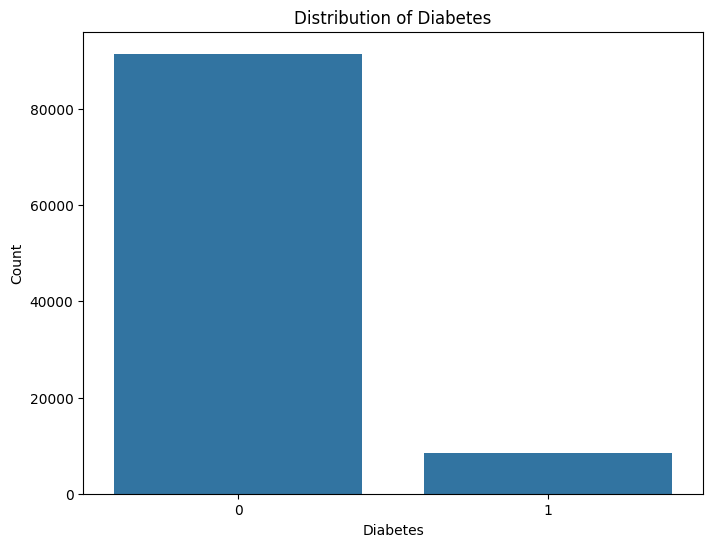

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='diabetes', data=df)
plt.title('Distribution of Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

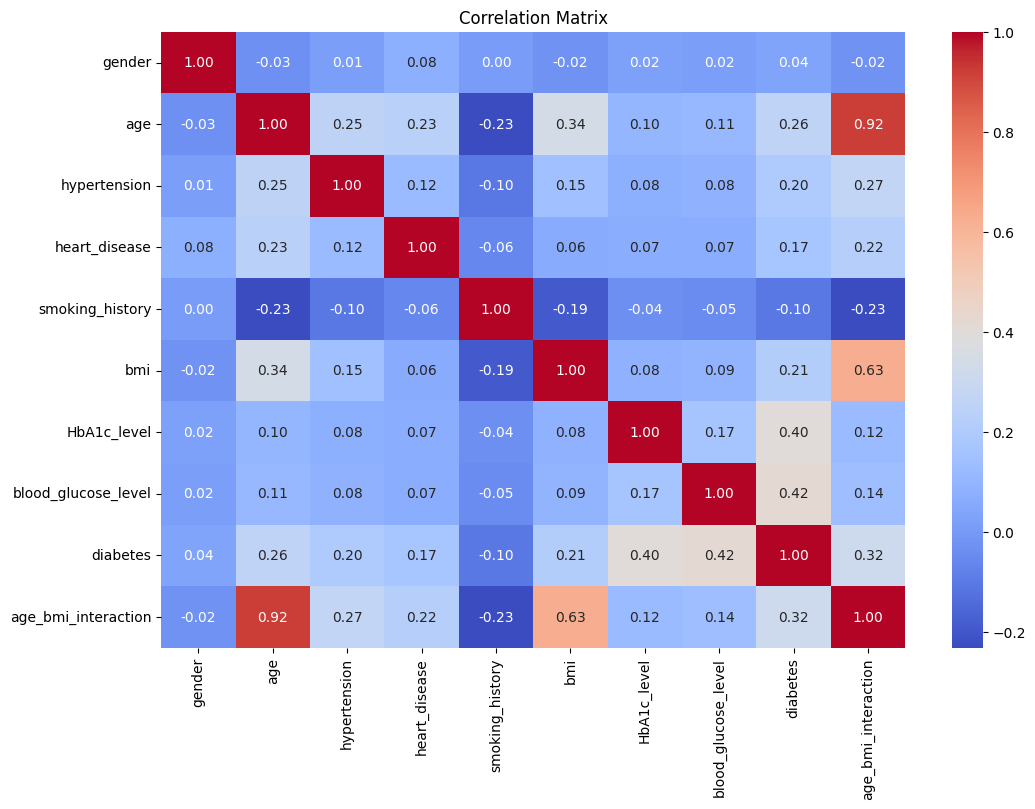

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


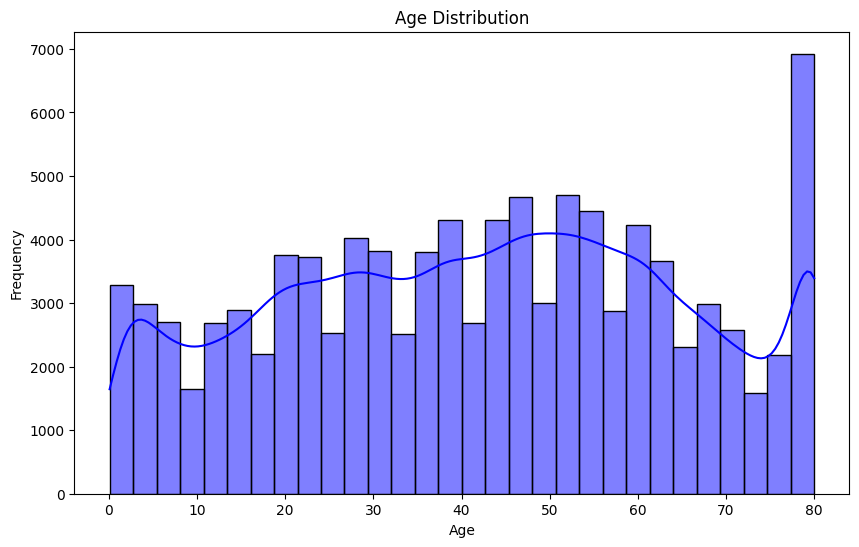

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


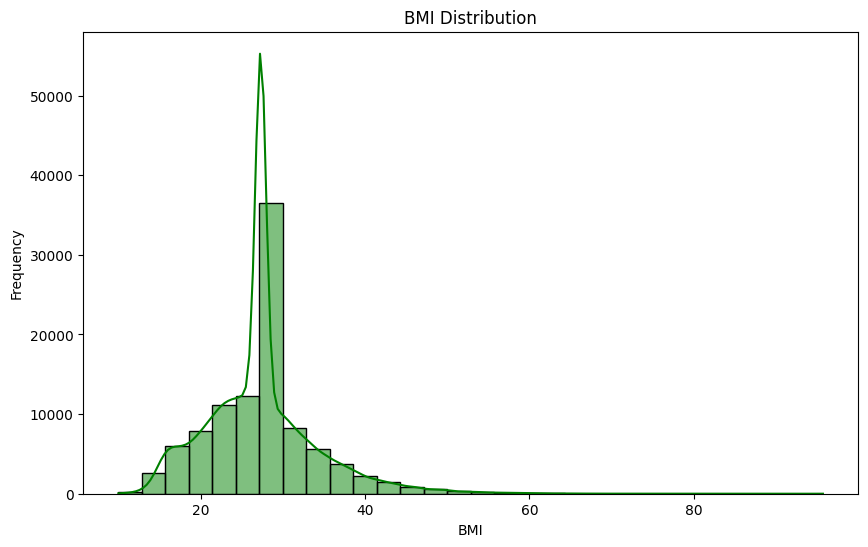

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], bins=30, kde=True, color='green')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


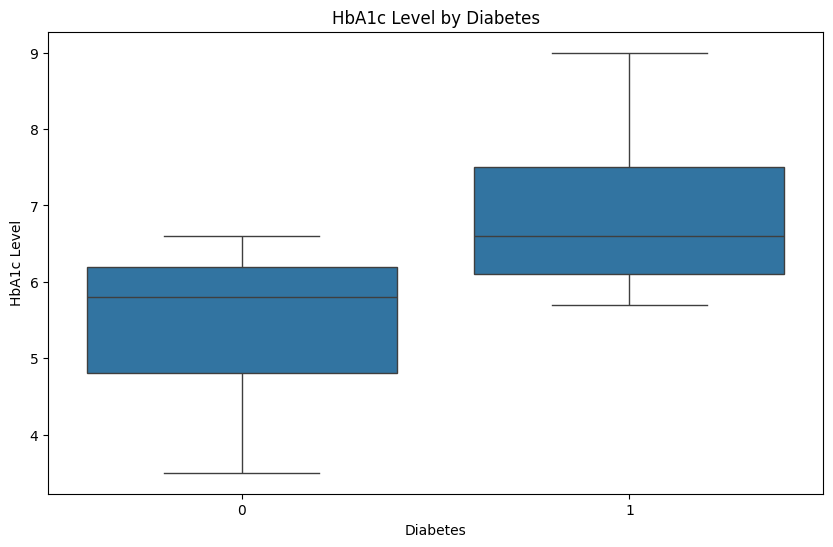

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c Level by Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('HbA1c Level')
plt.show()


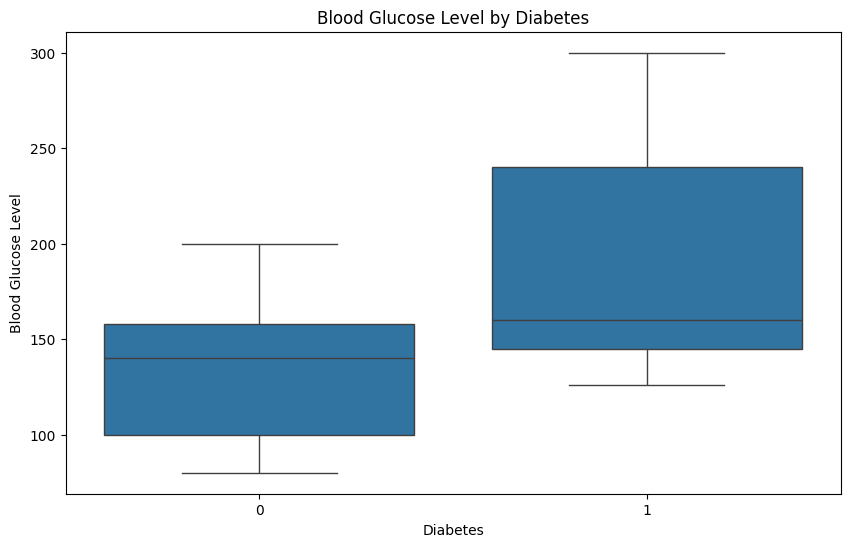

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level by Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Blood Glucose Level')
plt.show()


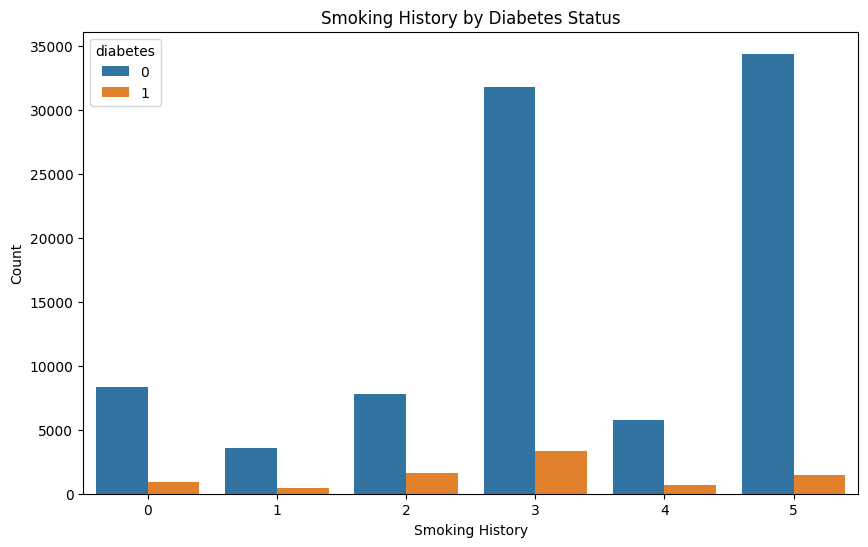

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_history', hue='diabetes', data=df)
plt.title('Smoking History by Diabetes Status')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.show()


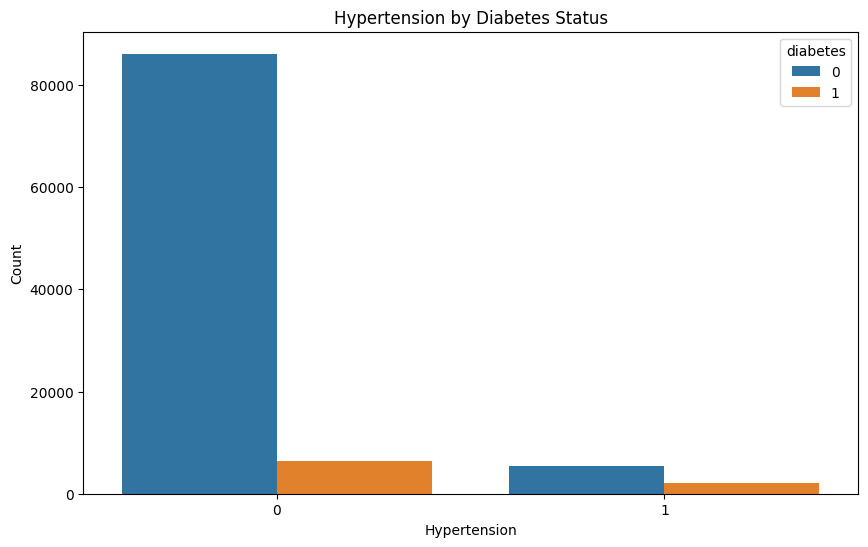

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='hypertension', hue='diabetes', data=df)
plt.title('Hypertension by Diabetes Status')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()


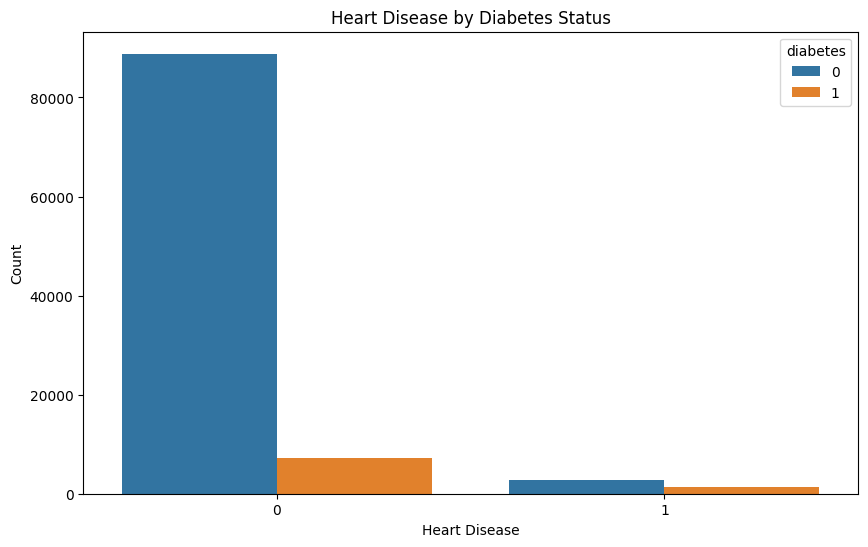

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='heart_disease', hue='diabetes', data=df)
plt.title('Heart Disease by Diabetes Status')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()


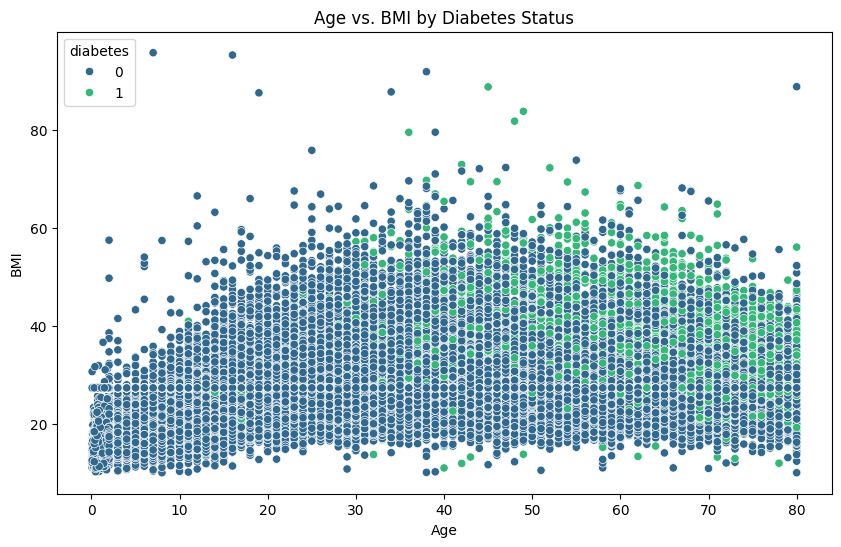

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df, palette='viridis')
plt.title('Age vs. BMI by Diabetes Status')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()


## **Data Preparation**

In [10]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

## **Feature Scaling**

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## **Train-Test Split**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## **Model Training and Evaluation**

In [14]:
# Model training and evaluation
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
}


results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    results = pd.concat([results, pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1],
        'ROC AUC': [roc_auc]
    })], ignore_index=True)

    print(f'{model_name} Classification Report:\n{classification_report(y_test, y_pred)}\n')
    print(f'{model_name} Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n')


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.86      0.64      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.91      0.82      0.86     20000
weighted avg       0.96      0.96      0.96     20000


Logistic Regression Confusion Matrix:
[[18117   183]
 [  609  1091]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.94      0.69      0.80      1700

    accuracy                           0.97     20000
   macro avg       0.96      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000


Random Forest Confusion Matrix:
[[18230    70]
 [  520  1180]]

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.96      

## **Display Results**

In [15]:
print("Model Performance Summary:")
print(results)

Model Performance Summary:
                    Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0     Logistic Regression   0.96040   0.856358  0.641765  0.733692  0.962393
1           Random Forest   0.97050   0.944000  0.694118  0.800000  0.964658
2  Support Vector Machine   0.96385   0.957826  0.601176  0.738706  0.929593
3     K-Nearest Neighbors   0.96020   0.871100  0.624118  0.727210  0.904563
4           Decision Tree   0.94970   0.693638  0.731176  0.711913  0.851012


## **Hyperparameter Tuning for Random Forest**

In [17]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("Best Random Forest Model:")
print(classification_report(y_test, y_pred_best))
print("Best Parameters:", grid_search.best_params_)


Best Random Forest Model:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18300
           1       0.99      0.68      0.81      1700

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}


## **Model Performance Comparison Plots**

<ipython-input-20-be6936db407f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results, ax=axes[0], palette=palette)
<ipython-input-20-be6936db407f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision', data=results, ax=axes[1], palette=palette)
<ipython-input-20-be6936db407f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall', data=results, ax=axes[2], palette=palette)


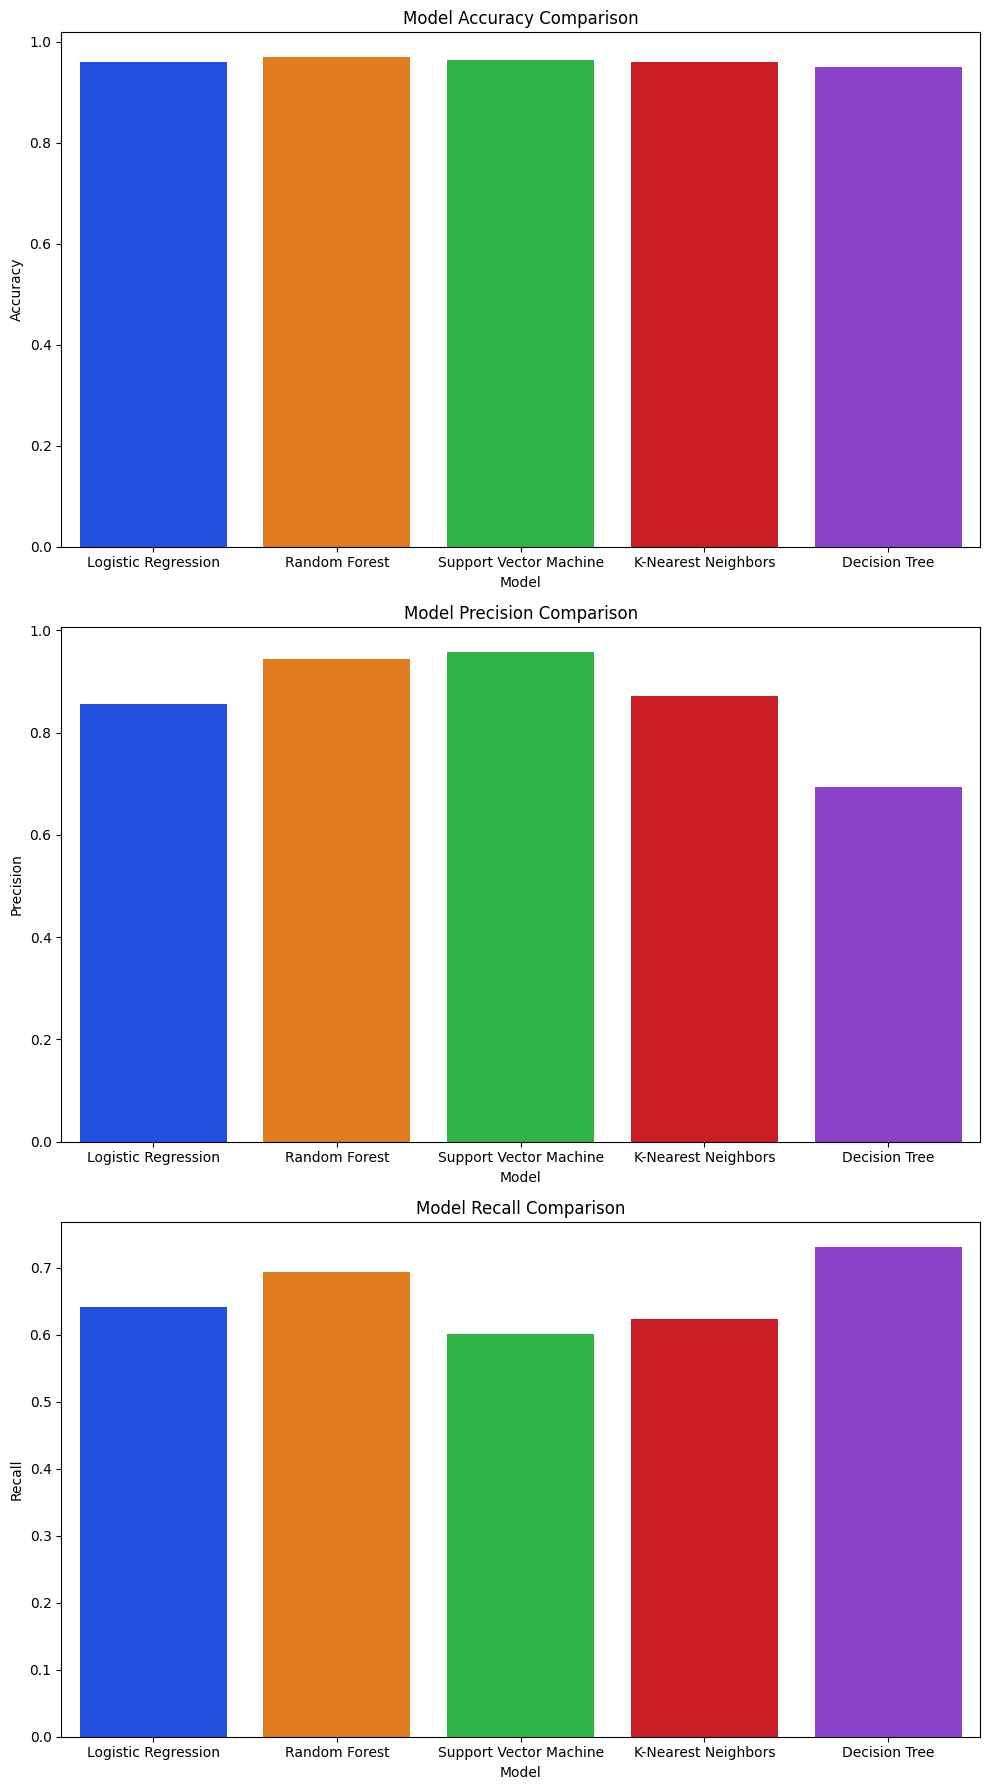

In [20]:
# Set a bright color palette
palette = sns.color_palette("bright", len(results['Model'].unique()))

fig, axes = plt.subplots(3, 1, figsize=(10, 18))

sns.barplot(x='Model', y='Accuracy', data=results, ax=axes[0], palette=palette)
axes[0].set_title('Model Accuracy Comparison')

sns.barplot(x='Model', y='Precision', data=results, ax=axes[1], palette=palette)
axes[1].set_title('Model Precision Comparison')

sns.barplot(x='Model', y='Recall', data=results, ax=axes[2], palette=palette)
axes[2].set_title('Model Recall Comparison')

plt.tight_layout()
plt.show()